In [1]:
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
import os 
os.chdir("D:/Training/Academy/ML(Python)/Datasets")

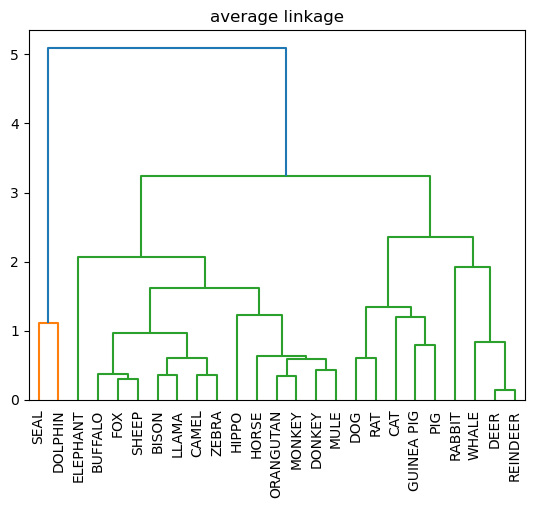

In [2]:
milk = pd.read_csv("milk.csv", index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(milk) 
link = "average"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings, labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()

In [3]:
link='average'
clust = AgglomerativeClustering(n_clusters=2, linkage=link)
clust.fit(df_scaled)
silhouette_score(df_scaled, labels=clust.labels_)

0.5186847578981009

In [4]:
linkages = ['ward', 'complete', 'average', 'single']
clusters = [2,3,4,5,6,7,8]
scores = []
for c in clusters:
    for link in linkages:
        clust = AgglomerativeClustering(n_clusters=c, linkage=link)
        clust.fit(df_scaled)
        scores.append([link, c, silhouette_score(df_scaled, labels=clust.labels_)])
df_scores = pd.DataFrame(scores, columns=['linkage','clusters','score'])
df_scores.sort_values('score', ascending=False)

,linkage,clusters,score
4,ward,3,0.539160
0,ward,2,0.525851
2,average,2,0.518685
3,single,2,0.518685
5,complete,3,0.487576
6,average,3,0.487576
1,complete,2,0.455789
8,ward,4,0.443481
17,complete,6,0.419614
10,average,4,0.416015


### PCA

In [5]:
from sklearn.decomposition import PCA

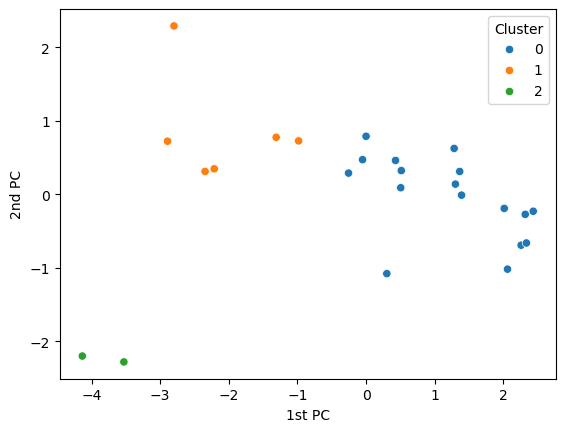

In [13]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(milk) 
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(df_scaled)
clust = AgglomerativeClustering(n_clusters=3, linkage='ward')
clust.fit(df_scaled)
pca_data = pca_data.iloc[:,:2]
pca_data['Cluster'] = clust.labels_
pca_data['Cluster'] = pca_data['Cluster'].astype(str)
sns.scatterplot(data=pca_data, x='pca0',y='pca1',hue='Cluster')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

### Nutrient

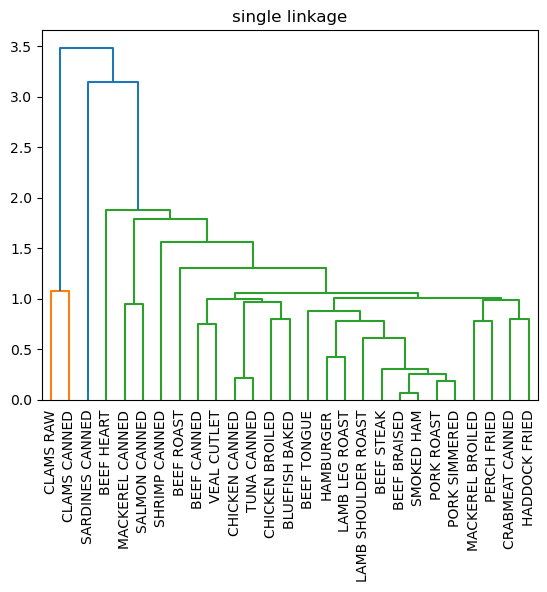

In [21]:
nut = pd.read_csv("nutrient.csv", index_col=0)
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(nut) 
link = "single"
mergings = linkage(df_scaled,method=link)
dendrogram(mergings, labels=list(df_scaled.index))
plt.title(link+" linkage")
plt.xticks(rotation=90)
plt.show()

In [16]:
linkages = ['ward', 'complete', 'average', 'single']
clusters = [2,3,4,5,6,7,8]
scores = []
for c in clusters:
    for link in linkages:
        clust = AgglomerativeClustering(n_clusters=c, linkage=link)
        clust.fit(df_scaled)
        scores.append([link, c, silhouette_score(df_scaled, labels=clust.labels_)])
df_scores = pd.DataFrame(scores, columns=['linkage','clusters','score'])
df_scores.sort_values('score', ascending=False)

,linkage,clusters,score
3,single,2,0.448342
6,average,3,0.445319
7,single,3,0.445319
8,ward,4,0.415801
9,complete,4,0.415801
2,average,2,0.413451
25,complete,8,0.404794
26,average,8,0.404794
4,ward,3,0.403730
5,complete,3,0.403730


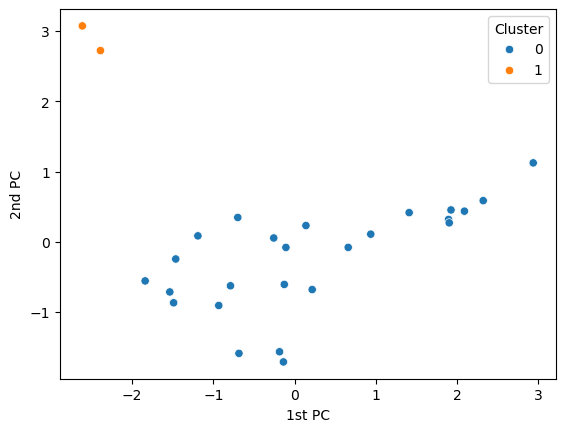

In [19]:
scaler = StandardScaler().set_output(transform='pandas')
df_scaled = scaler.fit_transform(nut) 
prcomp = PCA().set_output(transform='pandas')
pca_data = prcomp.fit_transform(df_scaled)
clust = AgglomerativeClustering(n_clusters=2, linkage='single')
clust.fit(df_scaled)
pca_data = pca_data.iloc[:,:2]
pca_data['Cluster'] = clust.labels_
pca_data['Cluster'] = pca_data['Cluster'].astype(str)
sns.scatterplot(data=pca_data, x='pca0',y='pca1',hue='Cluster')
plt.xlabel("1st PC")
plt.ylabel("2nd PC")
plt.show()

In [20]:
pca_data

,pca0,pca1,Cluster
Food_Item,,,
BEEF BRAISED,1.894907,0.318029,0
HAMBURGER,0.659812,-0.079563,0
BEEF ROAST,2.936755,1.122724,0
BEEF STEAK,2.321069,0.585663,0
BEEF CANNED,-0.256477,0.054382,0
CHICKEN BROILED,-0.932996,-0.905719,0
CHICKEN CANNED,-0.185016,-1.564189,0
BEEF HEART,-0.699024,0.346282,0
LAMB LEG ROAST,0.937389,0.108904,0
